In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
df_2015 = pd.read_csv('/content/2015.csv')
df_2016 = pd.read_csv('/content/2016.csv')
df_2017 = pd.read_csv('/content/2017.csv')
df_2018 = pd.read_csv('/content/2018.csv')
df_2019 = pd.read_csv('/content/2019.csv')
df_2020 = pd.read_csv('/content/2020.csv')
df_2021 = pd.read_csv('/content/2021.csv')

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64
--------------------------------------------------


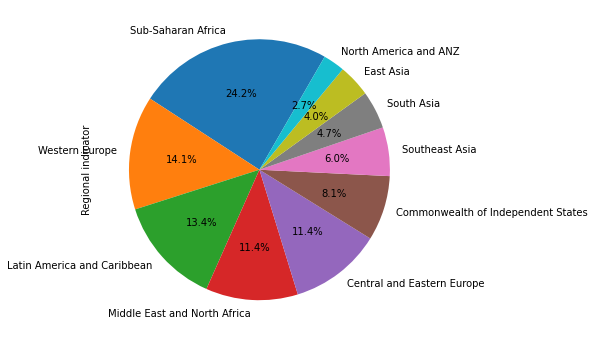

In [23]:
print(df_2021['Regional indicator'].value_counts())
print('-'*50)
df_2021['Regional indicator'].value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%', startangle=60)

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64
--------------------------------------------------


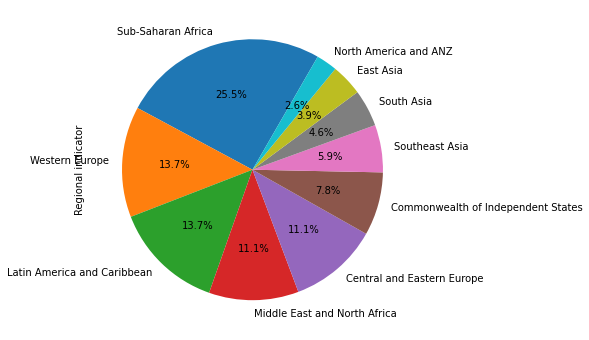

In [24]:
print(df_2020['Regional indicator'].value_counts())
print('-'*50)
df_2020['Regional indicator'].value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%', startangle=60)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
--------------------------------------------------


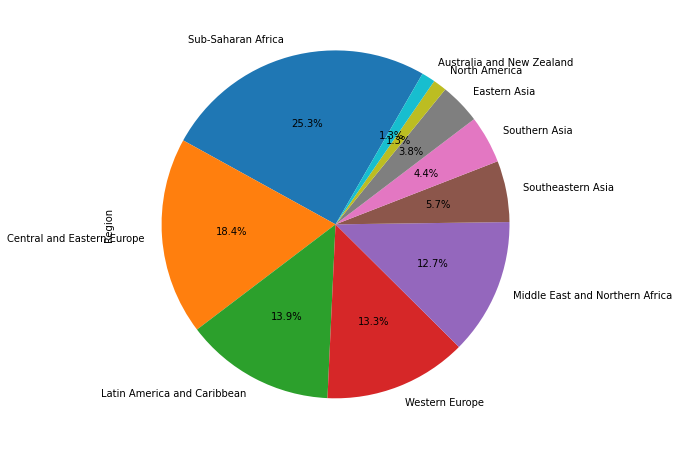

In [25]:
print(df_2015['Region'].value_counts())
print('-'*50)
df_2015['Region'].value_counts().plot.pie(figsize=(8,8),autopct='%1.1f%%', startangle=60)

In [26]:
top50_2021 = df_2021.iloc[:50,:]
top50_2021['Regional indicator'].value_counts()

Western Europe                        18
Central and Eastern Europe             9
Latin America and Caribbean            9
Middle East and North Africa           5
North America and ANZ                  4
Commonwealth of Independent States     2
East Asia                              1
Southeast Asia                         1
Sub-Saharan Africa                     1
Name: Regional indicator, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

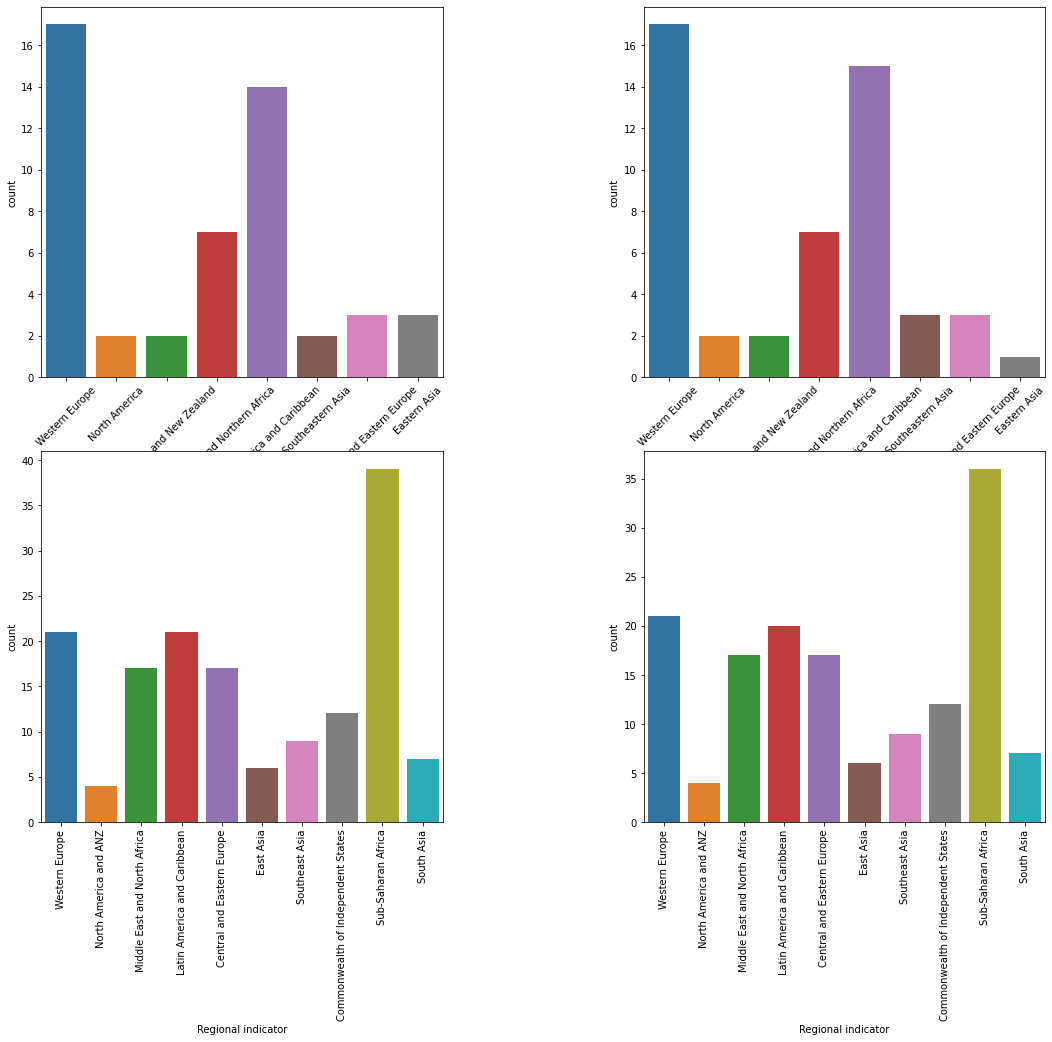

In [27]:
# prepare data frames
df2015 = df_2015.iloc[:50,:]
df2016 = df_2016.iloc[:50,:]
df2017 = df_2017.iloc[:50,:]
df2018 = df_2018.iloc[:50,:]
df2019 = df_2019.iloc[:50,:]
df2020 = df_2020.iloc[:50,:]
df2021 = df_2021.iloc[:50,:]


plt.figure(figsize=(18,15))



plt.subplots_adjust(wspace = .5)
plt.subplot(2,2,1)
sns.countplot(df2015['Region'])
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.countplot(df2016['Region'])
plt.xticks(rotation = 45)

plt.subplot(2,2,3)
sns.countplot(df_2020['Regional indicator'])
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
sns.countplot(df_2021['Regional indicator'])

plt.xticks(rotation = 90)

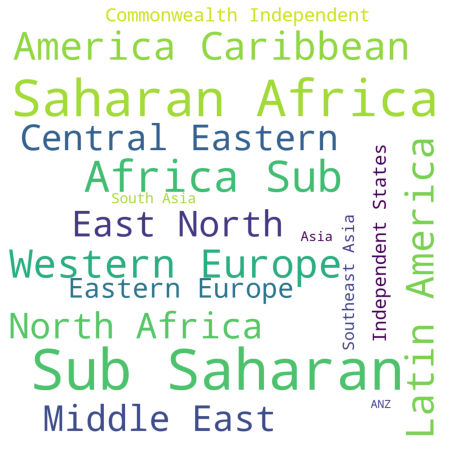

In [28]:
from wordcloud import WordCloud

word2021 = df_2021
word2021 = word2021['Regional indicator']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2021))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

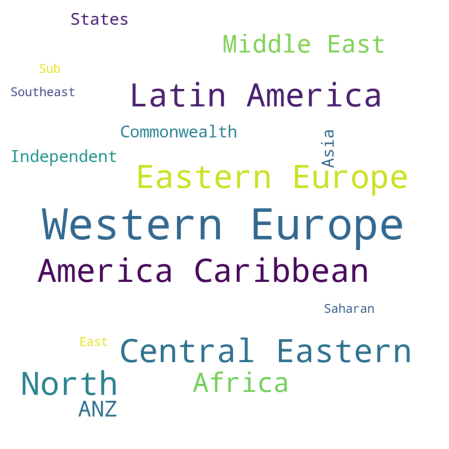

In [29]:
from wordcloud import WordCloud

word2021_top50_countries = df2021
word2021_top50_countries = word2021_top50_countries['Regional indicator']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2021_top50_countries))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

Custer the countries

In [33]:
year_2021 = df_2021.drop(['Ladder score in Dystopia','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity',
                 'Perceptions of corruption','upperwhisker', 'lowerwhisker', 'Country name','Standard error of ladder score','Regional indicator'],axis = 1)


year_2021 = year_2021.rename(columns = {'Ladder score':'Score', 'Explained by: Log GDP per capita': 'GDP', 'Explained by: Social support': 'socio-support', 'Explained by: Healthy life expectancy':'Health', 
'Explained by: Freedom to make life choices':'Life_choice', 'Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'corruption', 'Dystopia + residual':'Dystopia'}, inplace = False)

In [34]:
year_2021.head()

,Score,GDP,socio-support,Health,Life_choice,Generosity,corruption,Dystopia
0,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [36]:
from sklearn.preprocessing import StandardScaler
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(year_2021)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, columns = year_2021.columns)


In [40]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(Scaled_Data)
    wcss.append(km.inertia_)

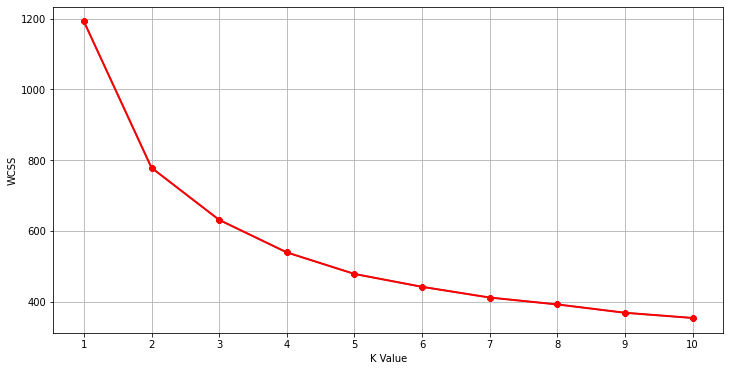

In [41]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [45]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
df_2021['Cluster'] = KMean_clust.labels_
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Cluster
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2


In [47]:
df_2021['Cluster'].value_counts()

1    78
0    44
2    27
Name: Cluster, dtype: int64